In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
data = pd.read_csv('../datasets/input.csv')
target = pd.read_csv('../datasets/target.csv')


In [3]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='outer')
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        1261 non-null   int64  
 1   인당_GDP    1261 non-null   float64
 2   부채비율      1261 non-null   float64
 3   실업률       1261 non-null   float64
 4   상품및서비스수입  1261 non-null   float64
 5   상품및서비스수출  1261 non-null   float64
 6   정치적안정성    1261 non-null   int64  
 7   규제의질      1261 non-null   int64  
 8   경상수지      1261 non-null   float64
 9   신용등급점수    1261 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 98.6 KB


In [4]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_GDP,부채비율,실업률,상품및서비스수입,상품및서비스수출,정치적안정성,규제의질,경상수지,신용등급점수
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,7.505155,22012.779330,55.695265,7.113140,4.170044,3.660556,54.612213,67.015860,-1.326674,12.526324
std,4.603761,22939.181148,37.783440,4.499929,10.071854,9.109875,27.897707,23.512842,7.070186,5.288810
min,0.000000,333.731576,-3.400000,0.210000,-50.275895,-56.736571,0.000000,6.000000,-41.526871,0.000000
25%,4.000000,4379.658787,30.300000,4.120000,0.200224,0.259701,29.000000,48.000000,-4.754963,8.000000
50%,8.000000,12808.038340,47.100000,6.120000,4.560764,4.075288,58.000000,70.000000,-1.742977,12.500000
75%,11.000000,36323.447740,70.780000,8.480000,9.093538,7.668103,79.000000,88.000000,2.367691,17.000000
max,15.000000,123514.196700,266.200000,31.110000,66.893243,86.043298,100.000000,100.000000,27.397650,20.000000


In [5]:
ols_ = sm.ols('신용등급점수 ~ 시점 + 인당_GDP + 부채비율 + 실업률	 + 상품및서비스수입 +  상품및서비스수출 + 정치적안정성 + 규제의질 + 경상수지',data=datasets)
result = ols_.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 신용등급점수   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     772.0
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        13:52:04   Log-Likelihood:                -2703.7
No. Observations:                1261   AIC:                             5427.
Df Residuals:                    1251   BIC:                             5479.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1328      0.255     12.270      0.0

In [6]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(ols_.exog, i)} 
             for i, column in enumerate(ols_.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,시점,1.117430
1,인당_GDP,2.730394
2,부채비율,1.104908
3,실업률,1.090072
4,상품및서비스수입,2.047311
5,상품및서비스수출,1.991855
6,정치적안정성,2.399994
7,규제의질,3.079062
8,경상수지,1.202993


d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


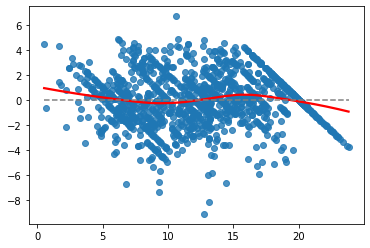

d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


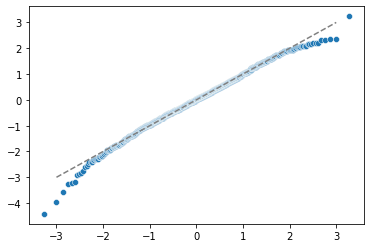

d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


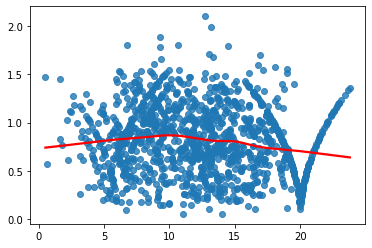

In [7]:
fitted = result.predict(datasets)
residual = datasets['신용등급점수'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.show()

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()

sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()

## 출처 : https://ysyblog.tistory.com/120